In [1]:
import os
import random
import tensorflow as tf
import numpy as np
import tensorflow_addons as tfa
from matplotlib import pyplot as plt

In [58]:
def AugmentationRotation(input1, GT):
    """

    :param input1: input, dim [seq, dimensionsImage[0], dimensionsImage[1], canal(2)]
    :param GT: (input2,input2,input3,conca)
    :return:
    """
    degree = tf.random.normal(shape=(),mean=0.0, stddev=15, dtype=tf.float32)
    rotation = degree * np.pi / 180.
    input1 = tfa.image.rotate(input1, rotation, interpolation="nearest")
    return input1,GT

def shearX(input):
    return tfa.image.shear_x(input, 0.3, 0)
def shearY(input):
    return tfa.image.shear_y(input, 0.3, 0)
def transformImg(imgIn,forward_transform):
    t = tfa.image.matrices_to_flat_transforms(tf.linalg.inv(forward_transform))
    # please notice that forward_transform must be a float matrix,
    # e.g. [[2.0,0,0],[0,1.0,0],[0,0,1]] will work
    # but [[2,0,0],[0,1,0],[0,0,1]] will not
    imgOut = tf.contrib.image.transform(imgIn, t, interpolation="BILINEAR",name=None)
    return imgOut
def shear_transform_example(filename,shear_lambda):
    image_string = tf.read_file(filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=3)
    img = transformImg(image_decoded, [[1.0,shear_lambda,0],[0,1.0,0],[0,0,1.0]])
    # Notice that this is a shear transformation parallel to the x axis
    # If you want a y axis version, use this:
    # img = transformImg(image_decoded, [[1.0,0,0],[shear_lambda,1.0,0],[0,0,1.0]])
    return img

@tf.function
def Shearing(input1,GT):
    input1 = tf.vectorized_map(shearX, input1)
    input1 = tf.vectorized_map(shearY, input1)
    return input1,GT

def configureDataset(dataset:tf.data.Dataset):

    datasetTrain = dataset.take(1)
    datasetValid = dataset.skip(1).take(1)

    # datasetTrain = datasetTrain.map(AugmentationRotation)
    # datasetTrain = datasetTrain.map(Shearing)

    # datasetTrain = datasetTrain.shuffle(buffer_size=10//3, reshuffle_each_iteration=True,seed=2)
    # if augment:
    #     dataset = dataset.map(to3D_AndAugmentation, num_parallel_calls=tf.data.AUTOTUNE) # repeat the GT + one hot encoding
    # else :
    #     dataset = dataset.map(to3D, num_parallel_calls=tf.data.AUTOTUNE) # repeat the GT + one hot encoding

    toPad = (
        (tf.constant(0,dtype=tf.float32)),
        (tf.constant(-1,dtype=tf.int32), tf.constant(-1,dtype=tf.int32), tf.constant(-1,dtype=tf.int32))
    )
    # if is4D:
    #     input_shape = tf.TensorShape(
    #         [None, dimensionsImage[0], dimensionsImage[1], dimensionsImage[2],])
    # else:
    input_shape = tf.TensorShape([None, 40, 40,2])

    output_shapes = (input_shape,
                     (tf.TensorShape([None, 1]), tf.TensorShape([None, 1]), tf.TensorShape([None, 1])))
    datasetTrain = datasetTrain.padded_batch(1, padded_shapes=output_shapes,
                                           padding_values=toPad)

    datasetValid = datasetValid.padded_batch(1, padded_shapes=output_shapes,
                                           padding_values=toPad)

    datasetTrain,datasetValid = datasetTrain.repeat(),datasetValid.repeat()
    return datasetTrain,datasetValid


In [60]:
pathDB = "C:\\workspace2\\Datasets\\2D\\MTG\\MTGSetB\\"
pathPreprocessedData = pathDB+"PreprocessedUntrimmedNewModeli65/Train/"
dataset = tf.data.experimental.load(pathPreprocessedData)

In [61]:
elem1 = next(iter(dataset))[0]

In [69]:
tf.shape(elem1[5][:,:])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([40, 40,  2])>

In [ ]:
tfa.image.shear_x(elem1[5][:,:],1, replace=0)

In [73]:
float_image = tf.random.uniform([32, 32, 3], 0, 1, dtype=tf.float32)
sheared_image = tfa.image.shear_x(float_image, 0.3, replace=0.5)

In [ ]:
dataset,datasetValid = configureDataset(dataset)

In [49]:
iterator = iter(dataset)

InvalidArgumentError: Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

<Figure size 432x288 with 0 Axes>

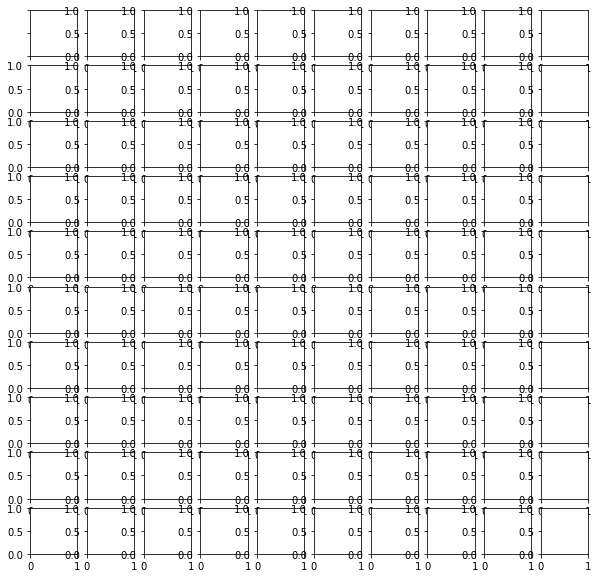

In [46]:
firstGesture =next(iterator)
firstGesture = firstGesture[0][0]
plt.gray()
_, axs = plt.subplots(10, 10, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(firstGesture[0:10*10], axs):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img[:,:,0])

<Figure size 432x288 with 0 Axes>

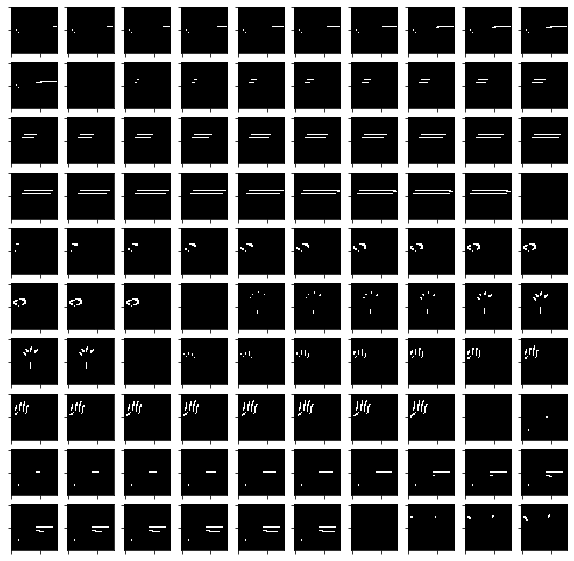

In [41]:
firstGesture =next(iterator)
firstGesture = firstGesture[0][0]
plt.gray()
_, axs = plt.subplots(10, 10, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(firstGesture[0:10*10], axs):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img[:,:,0])

<Figure size 432x288 with 0 Axes>

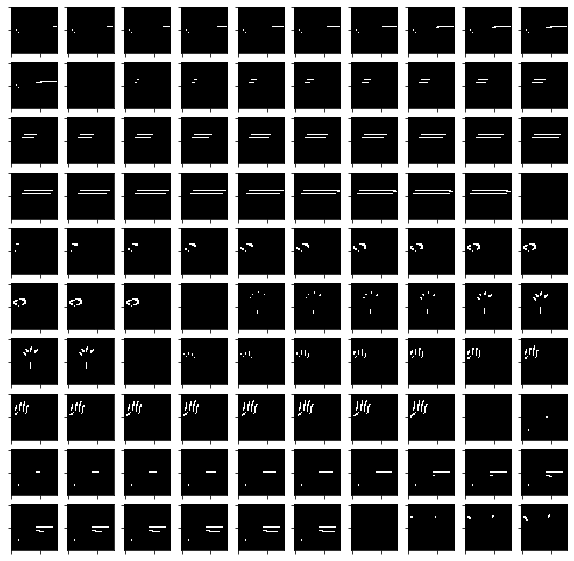

In [42]:
firstGesture =next(iterator)
firstGesture = firstGesture[0][0]
plt.gray()
_, axs = plt.subplots(10, 10, figsize=(10, 10))
axs = axs.flatten()
for img, ax in zip(firstGesture[0:10*10], axs):
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img[:,:,0])